## Disjoint Sets

In [2]:
import graphviz as gv
import numpy as np

def adjmShow(M, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(M)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  for u in range(n):
    for v in range(0 if directed else u, n):
      if weighted:
        if not np.isnan(M[u, v]):
          g.edge(str(u), str(v), f"{M[u, v]:.0f}")
      else:
        if M[u, v] == 1:
          g.edge(str(u), str(v))
  return g
def adjlShow(L, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

In [3]:
import graphviz as gv

def show(ds):
  s = ds.getSet()
  n = ds.getSize()
  G = gv.Digraph("merry")
  G.graph_attr["rankdir"] = "BT"
  for u in range(n):
    G.node(str(u))
  for u, parent in enumerate(s):
    if parent >= 0:
      G.edge(str(u), str(parent))
  return G

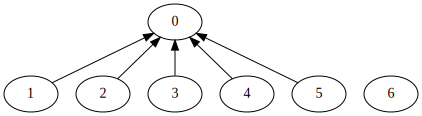

In [16]:
class DisjointSet:
    def __init__(self,n):
        self._ds = [-1]*n
        self._size = n
    def find(self,x):
        if self._ds[x] < 0:
            return x
        parent = self.find(self._ds[x])
        self._ds[x] = parent
        return parent
    def union(self,x,y):
        Xr = self.find(x)
        Yr = self.find(y)
        if Xr != Yr:
            if self._ds[Xr] > self._ds[Yr]:
                self._ds[Yr] += self._ds[Xr]
                self._ds[Xr] = Yr
            else:
                self._ds[Xr] += self._ds[Yr]
                self._ds[Yr] = Xr
    def isSameSet(self,x,y):
        Xr = self.find(x)
        Yr = self.find(y)
        return Xr == Yr
    def getSet(self):
        return self._ds
    def getSize(self):
        return self._size
s = DisjointSet(7)
s.union(0,1)
s.union(0,2)
s.union(4,5)
s.union(2,5)
s.union(5,3)
show(s)

## Kruskal Algotithm

[(1, 1, 6), (2, 1, 5), (3, 0, 1), (4, 4, 6), (4, 0, 3), (5, 4, 2), (8, 7, 3)]


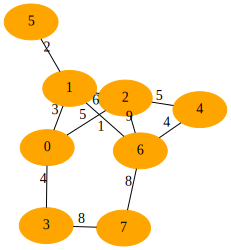

In [22]:
import Heap as hp

def Kruskal(graph):
    n = len(graph)
    pq = hp.Heap(lambda a, b: a[0] < b[0])
    result = []
    for v in range(n):
        for u, w in graph[v]:
            pq.push((w,v,u))
    ds = DisjointSet(n)
    while pq.Size() > 0 and n > 1:
        w, v, u = pq.pop()
        if not ds.isSameSet(v,u):
            ds.union(v,u)
            result.append((w,v,u))
            n -= 1
    return result
graph, _ = readAdjl("dijkstra.txt",weighted=True)
print(Kruskal(graph))
adjlShow(graph,weighted=True)